In [1]:
import numpy as np
import pandas as pd
from scipy.special import erf
from scipy.stats import norm
from scipy.stats import ncx2
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import lognorm
from matplotlib import cm
from matplotlib.ticker import LinearLocator

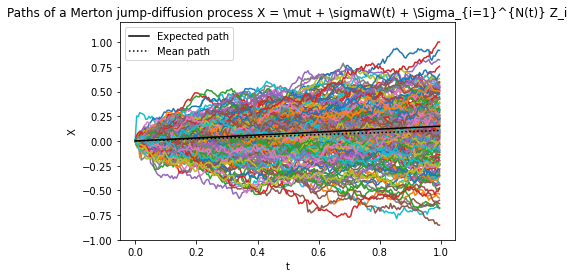

In [11]:
#Monte Carlo simulation of a Merton jump-diffusion process
#X(t) = (muS-0.5*sigma^2)*t + sigma*W(t) + sum_{i=1}^{N(t)} Z_i

#Define parameters and time grid
npaths = np.power(10,4)*2 # number of paths
T = 1 #time horizon
nsteps = 200 # number of time steps
dt = T/nsteps # time step
t = np.arange(0,T,dt) # observation times
muS, sigma = 0.2, 0.3 # model parameters of the diffusion part (GBM)
muJ, sigmaJ, lambdaz = -0.1,0.15, 0.5 # model parameters of the jump part (NCPP)
S0 = 1 # initial stock price

#Monte Carlo

#Compute the increments of ABM
dW=(muS-0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.randn(npaths,nsteps)

#Compute increments of the NCPP
dN=np.random.poisson(lambdaz*dt,[npaths,nsteps])
dJ=muJ*dN + sigmaJ*np.sqrt(dN)*np.random.randn(npaths,nsteps)

#Sum the increments of the ABM and NCPP
dX=dW+dJ

#Accumulate the increments
X=np.insert(dX,0,0,axis=1)
X=np.delete(X,-1,axis=1)
X=np.cumsum(X,axis=1)

#Stock price
#S=S0*np.exp(X)

#Expected, mean and sample path
plt.figure(1)
EX=(muS+(lambdaz*muJ))*t #expected path
df=pd.concat([pd.Series(x) for x in X],axis=1)
mean_path=df.apply(lambda row:np.mean(row),axis=1) #mean per step
for i in range(nsteps):
    plt.plot(t,X[i])
plt.plot(t,EX,'k',label='Expected path')
plt.plot(t,mean_path,':k',label='Mean path')
plt.legend()
plt.xlabel('t')
plt.ylabel('X')
plt.ylim([-1,1.2])
plt.title('Paths of a Merton jump-diffusion process X = \mut + \sigmaW(t) + \Sigma_{i=1}^{N(t)} Z_i')
plt.show()

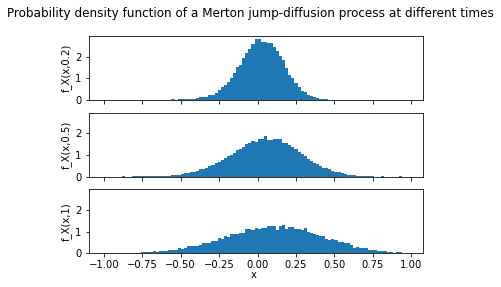

In [19]:
#Probability density function at different times
x=np.arange(-1,1,0.02)
fig, axs = plt.subplots(3,sharex=True,sharey=True)
fig.suptitle('Probability density function of a Merton jump-diffusion process at different times')
axs[0].hist(X[:,40],bins=x,density=True)
axs[0].set_ylabel('f_X(x,0.2)')
axs[1].hist(X[:,100],bins=x,density=True)
axs[1].set_ylabel('f_X(x,0.5)')
axs[2].hist(X[:,-1],bins=x,density=True)
axs[2].set_ylabel('f_X(x,1)')
fig.text(0.5,0.04,'x')
plt.show()